# Prediction with Random Forest

In [142]:
import pandas as pd
import numpy as np
import unicodedata
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time, math
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
from scipy.stats import spearmanr, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

### Import the preprocessed Data

In [143]:
train_df = pd.read_csv('data/preprocessed/preprocessed_drugs_train.csv', index_col=0)
test_df = pd.read_csv('data/preprocessed/preprocessed_drugs_test.csv', index_col=0)

train_df.shape, test_df.shape

((8564, 272), (3671, 270))

In [144]:
train_df.head()

,drug_id,administrative_status,approved_for_hospital_use,reimbursement_rate,marketing_declaration_date,marketing_authorization_date,price,logprice,marketing_authorization_process=autorisation d'importation parallèle,marketing_authorization_process=procédure centralisée,...,pca_activ_40,pca_activ_41,pca_activ_42,pca_activ_43,pca_activ_44,pca_activ_45,pca_activ_46,pca_activ_47,pca_activ_48,pca_activ_49
0,0_train,1,1,3,2014,2014,2.83,1.040277,0,0,...,-0.301111,-0.235909,-0.128850,-0.114894,-0.210798,-0.010246,-0.133336,0.044378,-0.097426,-0.262152
1,1_train,1,1,3,2013,2009,14.30,2.660260,0,0,...,3.097736,0.942979,0.536369,0.435568,0.855842,-0.138295,0.317979,0.008744,1.165968,0.470391
2,2_train,1,1,3,2000,1996,5.66,1.733424,0,0,...,0.106580,-0.137125,-0.011014,-0.312889,1.330081,0.532821,0.052581,-2.814183,0.304842,-1.307385
3,3_train,1,1,3,2005,2004,24.27,3.189241,0,0,...,2.114324,0.636709,0.399033,0.233576,0.569105,-0.029257,0.254523,-0.082015,-0.062670,0.373907
4,4_train,1,0,4,2015,2010,59.94,4.093344,0,0,...,-0.330995,-0.261211,-0.141472,-0.125627,-0.230657,-0.009805,-0.153064,0.053031,-0.106449,-0.298806


Drop 'price' and 'drug id' columns

In [145]:
#train_df = train_df.drop(['price', 'drug_id'], axis=1)
#train_df.head()

In [146]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = make_scorer(mape_error, greater_is_better=False)

In [147]:
hyperparameters = {'n_estimators': 850, 
                'n_jobs': -1, 
                'verbose': 1
                }   

FEATURES = [col for col in train_df.columns if col not in ['price', 'logprice', 'drug_id']]

In [148]:
mape_err = []
rmse_err = []
mae_err = []

X = train_df[FEATURES].values
y = train_df['logprice'].values

kfold = KFold(n_splits=5)
kfold = KFold(n_splits=5)
kfold.get_n_splits(X)

for train_index, valid_index in kfold.split(X):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
        
    regressor = RandomForestRegressor(**hyperparameters)
    t0 = time.time()
    regressor.fit(X_train, y_train)
    print("Fit in %0.3fs" % (time.time() - t0))
    y_pred = regressor.predict(X_valid)

    curr_mape_err = mape_error(np.exp(y_valid), np.exp(y_pred))
    curr_rmse_err = np.sqrt(mse(np.exp(y_valid), np.exp(y_pred)))
    curr_mae_err = mae(np.exp(y_valid), np.exp(y_pred))
    
    mape_err.append(curr_mape_err)
    rmse_err.append(curr_rmse_err)
    mae_err.append(curr_mae_err)
    print("MAPE error: {} | MSE error: {} | MAE error: {}".format(curr_mape_err, curr_rmse_err, curr_mae_err))
        
print("*** MAPE Error : mean =", np.mean(mape_err), '; std =', np.std(mape_err))
print("*** RMSE Error : mean =", np.mean(rmse_err), '; std =', np.std(rmse_err))
print("*** MAE Error : mean =", np.mean(mae_err), '; std =', np.std(mae_err))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 850 out of 850 | elapsed:  1.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s


Fit in 113.814s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 850 out of 850 | elapsed:    0.2s finished


MAPE error: 46.63270944942267 | MSE error: 55.96030490595923 | MAE error: 13.640196791121559


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 850 out of 850 | elapsed:  2.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 850 out of 850 | elapsed:    0.2s finished


Fit in 119.975s
MAPE error: 47.666878528444215 | MSE error: 53.0419953095599 | MAE error: 13.134826214299967


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 850 out of 850 | elapsed:  1.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s


Fit in 114.084s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 850 out of 850 | elapsed:    0.2s finished


MAPE error: 43.70445001736954 | MSE error: 57.623697411621265 | MAE error: 14.08831361958692


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 850 out of 850 | elapsed:  3.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s


Fit in 192.679s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 850 out of 850 | elapsed:    0.3s finished


MAPE error: 44.92183009508031 | MSE error: 65.3848747192099 | MAE error: 15.538271084870477


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 850 out of 850 | elapsed:  3.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s


Fit in 232.886s
MAPE error: 41.3853072693021 | MSE error: 55.14396465190082 | MAE error: 13.742026332858153
*** MAPE Error : mean = 44.86223507192376 ; std = 2.2105949056107397
*** RMSE Error : mean = 57.43096739965023 ; std = 4.241652797007647
*** MAE Error : mean = 14.028726808547413 ; std = 0.814184932288347


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 850 out of 850 | elapsed:    0.2s finished


 **Feature importance**

In [149]:
importance_df = pd.DataFrame(clf.feature_importances_, columns=["Importance"], index=list(FEATURES)).sort_values(['Importance'], ascending = True)
importance_df = importance_df.iloc[-30:]  
importance_df.plot(kind='barh', title ="Feature importances (Train set)", grid=True, figsize=(24, 16))

ValueError: Shape of passed values is (592, 1), indices imply (269, 1)

**We use the last validation set and use it to make predictions**

We visualize the scatter plot of the predictions and compute a correlation metric.


Train

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.1s finished


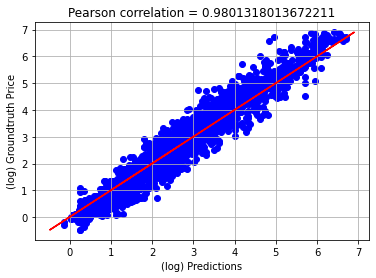

In [85]:
#plt.scatter(np.exp(y_pred), np.exp(y_valid), c='blue')
y_pred_train = clf.predict(X_train)
r = pearsonr(y_train, y_pred_train)
plt.scatter(y_pred_train, y_train, c='blue')
plt.plot(y_train, y_train, c='red')
plt.grid()
plt.xlabel("(log) Predictions")
plt.ylabel("(log) Groundtruth Price")
plt.title("Pearson correlation = {}".format(r[0]))
plt.show()

## Hyperparameter tuning

**Train test split**

In [86]:
X = train_df[FEATURES].values
y = train_df['logprice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((6851, 592), (1713, 592))

**Hyperparameters search grid**

We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [74]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'max_features': max_features
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt']}


In [75]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 2,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1
                              )

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .max_depth=90, max_features=sqrt, n_estimators=2000; total time= 2.5min
[CV] END .max_depth=90, max_features=sqrt, n_estimators=2000; total time= 2.5min
[CV] END .max_depth=90, max_features=sqrt, n_estimators=2000; total time= 2.5min
[CV] END ..max_depth=60, max_features=auto, n_estimators=600; total time=11.3min
[CV] END ..max_depth=60, max_features=auto, n_estimators=600; total time=11.6min
[CV] END ..max_depth=60, max_features=auto, n_estimators=600; total time=11.8min


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=2, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

**Best parameters**

In [76]:
rf_random.best_params_

{'n_estimators': 600, 'max_features': 'auto', 'max_depth': 60}

**Predictions**

In [79]:
rf_best = rf_random.best_estimator_
y_pred_test = rf_best.predict(X_test)

mape_test = mape_error(np.exp(y_test), np.exp(y_pred_test))
rmse_test = np.sqrt(mse(np.exp(y_test), np.exp(y_pred_test)))
mae_test = mae(np.exp(y_test), np.exp(y_pred_test))

mape_test, rmse_test, mae_test

(23.882776267880132, 38.157045190854106, 8.529788484332665)

***Scatter plot***

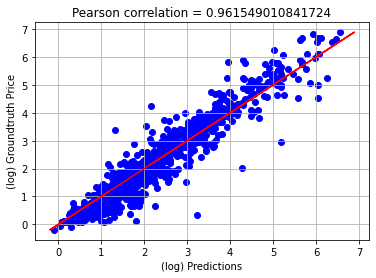

In [80]:
#plt.scatter(np.exp(y_pred), np.exp(y_valid), c='blue')

r = pearsonr(y_test, y_pred_test)
plt.scatter(y_pred_test, y_test, c='blue')
plt.plot(y_test, y_test, c='red')
plt.grid()
plt.xlabel("(log) Predictions")
plt.ylabel("(log) Groundtruth Price")
plt.title("Pearson correlation = {}".format(r[0]))
plt.show()